In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['font.family'] = 'Times New Roman'

import pingouin as pg

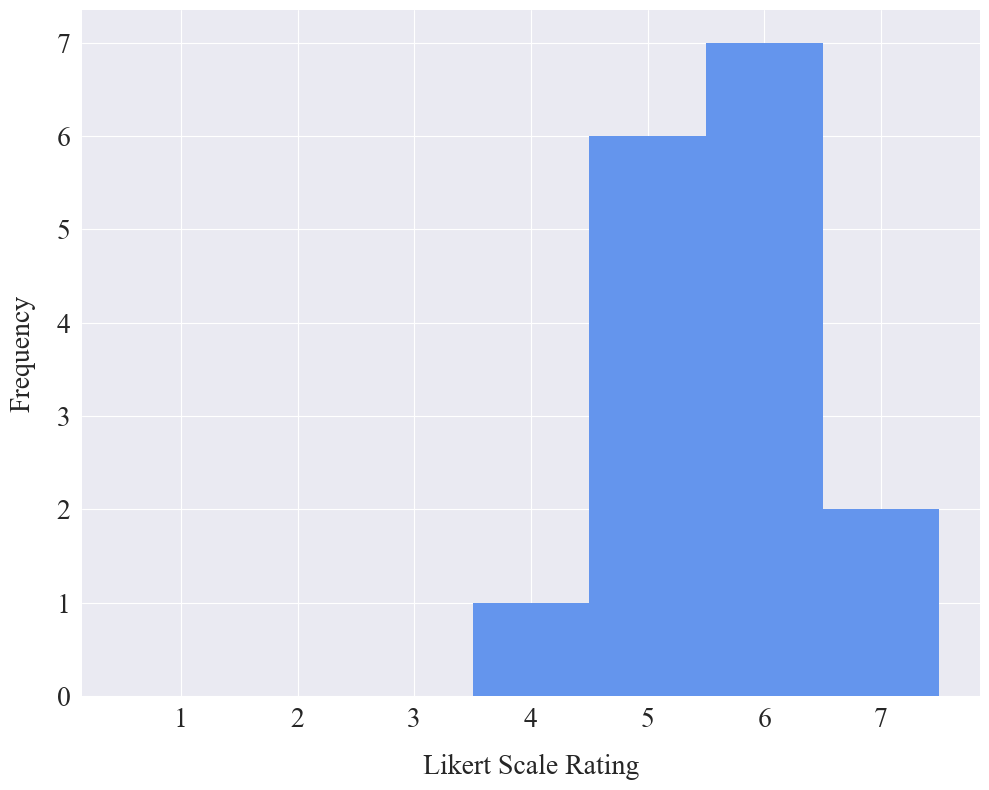

In [6]:
failed_normality_data = pd.concat([df.iloc[0:8, test_list[i]], df.iloc[32:40, test_list[i]]]).tolist()

fig, ax = plt.subplots(figsize=(10, 8))

counts, bins, patches = ax.hist(
    failed_normality_data,
    bins=np.arange(0.5, 8.5, 1),
    color='cornflowerblue',
)

# Hide bars with zero height
for patch, count in zip(patches, counts):
    if count == 0:
        patch.set_edgecolor('none')

# Format the plot
ax.set_xticks(range(1, 8))
ax.set_xlabel('Likert Scale Rating', labelpad=15, fontsize=20)
ax.set_ylabel('Frequency', labelpad=15, fontsize=20)
ax.tick_params(axis='x', labelsize=20, pad=8)
ax.tick_params(axis='y', labelsize=20,pad=8)

plt.tight_layout()
plt.savefig(
    "./plot/fig_01.png",      # File name and extension
    dpi=300,            # Resolution (300+ for print quality)
    bbox_inches='tight',# Trims whitespace around the figure
    transparent=False   # Set to True if saving over transparent background (for PNG)
)

In [3]:
df = pd.read_csv('./data/after.csv')
df.drop(df.columns[0], axis=1, inplace=True)
df

,時間戳記,1. 您的实验编号？,2. 我能够感受到机器人的正面评价，如「你真厉害」、「做得很好」,3. 我能够感受到机器人把好的结果归因到了,4. 我能够感受到机器人的负面评价，如「做得不对」、「完成得不好」,5. 我能够感受到机器人把不好的结果归因到了,6. 我能够感受到机器人给我的评价,7. 我认同NAO对我的正面评价，我认为自己确实表现得不错,8. 我认为，在刚刚的实验任务中，动作完成得好主要是依赖于,9. 我认为，动作完成得好主要是______的功劳,...,75. 机器人只能做人类指示它去做的事情,76. 机器人永远不会做任何运行程序以外的事情,77. 我希望在本次实验中表现出色,78. 我相信我可以掌握本次实验中机器人教授的基本动作,79. 我相信我将在本次实验中取得优异的成绩,80. 我相信我可以掌握本次实验中机器人教授的动作,81. 我有信心在本次实验中表现出色,82. 我相信我能理解本次实验中机器人教授的困难动作,83. 我相信我能理解本次实验中机器人教授的复杂动作,84. 我相信我将在本次实验中出色地完成动作
0,2022-07-23 19:08:40.435,17,5,3,5,3,正面评价和负面评价相当,5,3,4,...,7,7,5,5,5,5,5,3,3,6
1,2022-07-24 10:42:36.312,25,7,2,7,6,正面评价更多,4,5,5,...,6,7,7,5,5,4,4,5,5,3
2,2022-07-24 11:30:04.161,49,6,3,6,2,正面评价和负面评价相当,4,4,3,...,5,3,6,5,3,4,3,4,3,3
3,2022-07-24 13:41:12.631,9,7,5,6,4,正面评价更多,4,5,4,...,7,7,7,4,4,4,2,1,1,1
4,2022-07-24 14:22:01.431,1,6,6,5,6,正面评价更多,4,4,3,...,4,3,6,5,6,5,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,2022-07-31 10:44:46.640,56,7,1,7,1,正面评价和负面评价相当,5,2,2,...,7,7,4,7,7,7,7,7,7,6
60,2022-07-31 11:30:54.182,24,5,5,6,3,正面评价和负面评价相当,5,3,3,...,5,4,6,5,5,5,5,5,6,5
61,2022-07-31 12:42:42.503,32,7,2,5,7,正面评价更多,4,5,4,...,7,2,6,6,5,6,6,6,6,5
62,2022-08-01 10:20:24.240,14,5,3,5,4,正面评价更多,6,2,3,...,5,5,6,6,6,6,6,6,6,6


In [14]:
df.iloc[:, 33:36]

,33. 听到机器人的正面评价，我会认为自己受到了表扬,34. 我认为机器人有资格对我提出表扬,35. 我认可和接受机器人对我表扬
0,5,5,4
1,6,5,5
2,5,5,5
3,7,7,7
4,6,5,6
...,...,...,...
59,1,7,1
60,4,5,4
61,6,6,7
62,6,6,6


In [15]:
pg.cronbach_alpha(data=df.iloc[:, 33:36])

(np.float64(0.8188626525891487), array([0.726, 0.884]))

This is my first implementation of Cronbach's Alpha, a rather nice success. Other than this, I think I "only" need to learn how to do ANOVA Data Analysis properly.

In [16]:
df.iloc[:, 36:39]

,36. 听到机器人的负面评价，我会认为自己受到了批评,37. 我认为机器人有资格对我提出批评,38. 我认可和接受机器人对我的批评
0,6,4,4
1,7,4,4
2,5,5,5
3,4,4,5
4,5,4,4
...,...,...,...
59,1,7,1
60,5,5,5
61,3,6,5
62,4,5,5


In [17]:
pg.cronbach_alpha(data=df.iloc[:, 36:39])

(np.float64(0.5618394609291877), array([0.336, 0.72 ]))

I am guessing the value would increase dramatically if the "ID" data points are removed

In [18]:
EI_dataset = pd.concat([df.iloc[0:8, 36:39], df.iloc[32:40, 36:39]])
ID_dataset = pd.concat([df.iloc[8:16, 36:39], df.iloc[40:48, 36:39]])
II_dataset = pd.concat([df.iloc[16:24, 36:39], df.iloc[48:56, 36:39]])
ED_dataset = pd.concat([df.iloc[24:32, 36:39], df.iloc[56:64, 36:39]])

test_df = pd.concat([II_dataset, EI_dataset, ED_dataset])
test_df.reset_index(drop=True, inplace=True)
test_df

,36. 听到机器人的负面评价，我会认为自己受到了批评,37. 我认为机器人有资格对我提出批评,38. 我认可和接受机器人对我的批评
0,7,7,3
1,4,6,6
2,3,3,3
3,6,5,5
4,3,5,5
5,1,7,7
6,2,4,5
7,5,4,4
8,5,5,5
9,7,3,3


In [19]:
pg.cronbach_alpha(data=EI_dataset)

(np.float64(0.7512038523274479), array([0.426, 0.906]))

In [20]:
pg.cronbach_alpha(data=ID_dataset)

(np.float64(0.8057570262919311), array([0.552, 0.927]))

In [21]:
pg.cronbach_alpha(data=II_dataset)

(np.float64(0.07010869565217376), array([-1.145,  0.648]))

In [22]:
pg.cronbach_alpha(data=ED_dataset)

(np.float64(0.3028603477285473), array([-0.608,  0.736]))

In [23]:
df.iloc[:, 39:44]

,39. 机器人的正面评价让我感到,40. 机器人的正面反馈让我感到,41. 机器人的正面反馈能够______我学习的热情,42. 机器人的正面反馈______了我的自信,43. 机器人的正面反馈______了我的学习动力
0,6,6,5,5,5
1,7,6,7,6,6
2,6,6,5,5,5
3,5,5,6,7,7
4,5,3,6,6,6
...,...,...,...,...,...
59,4,7,4,4,4
60,4,5,5,5,5
61,6,7,4,4,5
62,5,5,6,6,6


In [24]:
pg.cronbach_alpha(data=df.iloc[:, 39:44])

(np.float64(0.8313969837346634), array([0.756, 0.889]))

In [25]:
df.iloc[:, 45:50]

,45. 机器人的负面评价让我感到,46. 机器人的负面反馈让我感到,47. 机器人的负面反馈能够______我学习的热情,48. 机器人的负面反馈______了我的自信,49. 机器人的负面反馈______了我的学习动力
0,3,2,2,2,2
1,1,1,2,1,1
2,3,3,3,3,3
3,4,4,4,4,4
4,3,3,3,4,3
...,...,...,...,...,...
59,1,3,5,6,6
60,2,2,2,3,2
61,3,4,5,5,6
62,3,3,4,4,5


In [26]:
pg.cronbach_alpha(data=df.iloc[:, 45:50])

(np.float64(0.8473064343059561), array([0.779, 0.899]))

In [27]:
# 15, 18, 21
pg.cronbach_alpha(data=df[df.columns[[15, 18, 21]]])

(np.float64(0.6362385797342194), array([0.449, 0.767]))

In [28]:
pg.cronbach_alpha(data=pd.concat([df[df.columns[[15, 18, 21]]].iloc[0:8,], df[df.columns[[15, 18, 21]]].iloc[32:40,]]))

(np.float64(0.6941105769230769), array([0.294, 0.884]))

In [29]:
pg.cronbach_alpha(data=pd.concat([df[df.columns[[15, 18, 21]]].iloc[8:16,], df[df.columns[[15, 18, 21]]].iloc[40:48,]]))

(np.float64(0.393939393939394), array([-0.398,  0.771]))

In [30]:
pg.cronbach_alpha(data=pd.concat([df[df.columns[[15, 18, 21]]].iloc[16:24,], df[df.columns[[15, 18, 21]]].iloc[48:56,]]))

(np.float64(0.6438419117647058), array([0.178, 0.865]))

In [31]:
pg.cronbach_alpha(data=pd.concat([df[df.columns[[15, 18, 21]]].iloc[24:32,], df[df.columns[[15, 18, 21]]].iloc[56:64,]]))

(np.float64(0.6650521609538005), array([0.227, 0.873]))

In [32]:
# 24, 27, 30
pg.cronbach_alpha(data=df[df.columns[[24, 27, 30]]])

(np.float64(0.8107519823103635), array([0.713, 0.879]))

In [33]:
# 16, 19, 22
pg.cronbach_alpha(data=df[df.columns[[16, 19, 22]]])

(np.float64(0.5307911392405064), array([0.289, 0.7  ]))

In [34]:
EI_dataset = pd.concat([df.iloc[0:8, 36:39], df.iloc[32:40, 36:39]])
ID_dataset = pd.concat([df.iloc[8:16, 36:39], df.iloc[40:48, 36:39]])
II_dataset = pd.concat([df.iloc[16:24, 36:39], df.iloc[48:56, 36:39]])
ED_dataset = pd.concat([df.iloc[24:32, 36:39], df.iloc[56:64, 36:39]])

In [35]:
pg.cronbach_alpha(data=pd.concat([df[df.columns[[16, 19, 22]]].iloc[0:8,], df[df.columns[[16, 19, 22]]].iloc[32:40,]]))

(np.float64(0.7948591201186359), array([0.527, 0.922]))

In [36]:
pg.cronbach_alpha(data=pd.concat([df[df.columns[[16, 19, 22]]].iloc[8:16,], df[df.columns[[16, 19, 22]]].iloc[40:48,]]))

(np.float64(0.5343793262574988), array([-0.074,  0.824]))

In [37]:
pg.cronbach_alpha(data=pd.concat([df[df.columns[[16, 19, 22]]].iloc[16:24,], df[df.columns[[16, 19, 22]]].iloc[48:56,]]))

(np.float64(0.22665847665847666), array([-0.784,  0.707]))

In [38]:
pg.cronbach_alpha(data=pd.concat([df[df.columns[[16, 19, 22]]].iloc[24:32,], df[df.columns[[16, 19, 22]]].iloc[56:64,]]))

(np.float64(0.40557065217391297), array([-0.371,  0.775]))

In [39]:
# 25, 28, 31
pg.cronbach_alpha(data=df[df.columns[[25, 28, 31]]])

(np.float64(0.3474824774710342), array([0.012, 0.582]))

In [40]:
pg.cronbach_alpha(data=pd.concat([df[df.columns[[25, 28, 31]]].iloc[0:8,], df[df.columns[[25, 28, 31]]].iloc[32:40,]]))

(np.float64(0.5805114029025572), array([0.032, 0.841]))

In [41]:
pg.cronbach_alpha(data=pd.concat([df[df.columns[[25, 28, 31]]].iloc[8:16,], df[df.columns[[25, 28, 31]]].iloc[40:48,]]))

(np.float64(0.34660574412532635), array([-0.507,  0.753]))

In [42]:
pg.cronbach_alpha(data=pd.concat([df[df.columns[[25, 28, 31]]].iloc[16:24,], df[df.columns[[25, 28, 31]]].iloc[48:56,]]))

(np.float64(0.39285714285714296), array([-0.401,  0.77 ]))

In [43]:
pg.cronbach_alpha(data=pd.concat([df[df.columns[[25, 28, 31]]].iloc[24:32,], df[df.columns[[25, 28, 31]]].iloc[56:64,]]))

(np.float64(0.12143227815256857), array([-1.027,  0.668]))

In [44]:
pd.concat([df.iloc[:, 25:26], df.iloc[:,28:29], df.iloc[:,31:32]])

,25. 我认为，动作完成得不好主要是因为我不够认真/努力,28. 我认为，表现不佳在很大程度上是因为我自己所说的话和所做的事,31. 我认为，我自己需要为刚刚的不佳表现承担大多数责任
0,4.0,NaN,NaN
1,1.0,NaN,NaN
2,4.0,NaN,NaN
3,4.0,NaN,NaN
4,3.0,NaN,NaN
...,...,...,...
59,NaN,NaN,1.0
60,NaN,NaN,3.0
61,NaN,NaN,5.0
62,NaN,NaN,4.0


In [45]:
# 51, 52, 53, 55
pg.cronbach_alpha(data=df[df.columns[[51, 52, 53, 55]]])

(np.float64(0.8555629840102512), array([0.788, 0.906]))

In [5]:
import scipy.stats as stats
import numpy as np

test_list = list(range(0, 64))
test_list.remove(0)
test_list.remove(6)

for i in range(len(test_list)):
    EI_dataclip = stats.boxcox(pd.concat([df.iloc[0:8, test_list[i]], df.iloc[32:40, test_list[i]]]).tolist())[0]
    ID_dataclip = stats.boxcox(pd.concat([df.iloc[8:16, test_list[i]], df.iloc[40:48, test_list[i]]]).tolist())[0]
    II_dataclip = stats.boxcox(pd.concat([df.iloc[16:24, test_list[i]], df.iloc[48:56, test_list[i]]]).tolist())[0]
    ED_dataclip = stats.boxcox(pd.concat([df.iloc[24:32, test_list[i]], df.iloc[56:64, test_list[i]]]).tolist())[0]

    shapiro_test_EI = stats.shapiro(EI_dataclip)
    shapiro_test_ID = stats.shapiro(ID_dataclip)
    shapiro_test_II = stats.shapiro(II_dataclip)
    shapiro_test_ED= stats.shapiro(ED_dataclip)

    
    if shapiro_test_EI[1] > 0.05:
        shapiro_test_EI = 'Y'
    else:
        shapiro_test_EI = 'N'

    if shapiro_test_ID[1] > 0.05:
        shapiro_test_ID = 'Y'
    else:
        shapiro_test_ID = 'N'

    if shapiro_test_II[1] > 0.05:
        shapiro_test_II = 'Y'
    else:
        shapiro_test_II = 'N'

    if shapiro_test_ED[1] > 0.05:
        shapiro_test_ED = 'Y'
    else:
        shapiro_test_ED = 'N'
    
    print("Shapiro-Wilk Test Results for question [{}]:".format(test_list[i]), shapiro_test_EI, shapiro_test_ID, shapiro_test_II, shapiro_test_ED)

Shapiro-Wilk Test Results for question [1]: Y Y Y Y
Shapiro-Wilk Test Results for question [2]: N N N N
Shapiro-Wilk Test Results for question [3]: Y Y Y Y
Shapiro-Wilk Test Results for question [4]: N N N N
Shapiro-Wilk Test Results for question [5]: Y N Y Y
Shapiro-Wilk Test Results for question [7]: Y N Y Y
Shapiro-Wilk Test Results for question [8]: Y Y Y Y
Shapiro-Wilk Test Results for question [9]: Y Y Y Y
Shapiro-Wilk Test Results for question [10]: Y Y Y Y
Shapiro-Wilk Test Results for question [11]: N Y Y N
Shapiro-Wilk Test Results for question [12]: Y N Y Y
Shapiro-Wilk Test Results for question [13]: N Y Y Y
Shapiro-Wilk Test Results for question [14]: Y N Y Y
Shapiro-Wilk Test Results for question [15]: Y Y Y N
Shapiro-Wilk Test Results for question [16]: N Y Y N
Shapiro-Wilk Test Results for question [17]: Y N N Y
Shapiro-Wilk Test Results for question [18]: N Y Y Y
Shapiro-Wilk Test Results for question [19]: N Y N Y
Shapiro-Wilk Test Results for question [20]: N N N N
S

In [47]:
pd.concat([df.iloc[0:8, test_list[i]], df.iloc[32:40, test_list[i]]]).tolist()

[5, 6, 5, 7, 4, 6, 6, 6, 6, 7, 5, 5, 5, 5, 6, 6]

In [ ]:
failed_normality_data = pd.concat([df.iloc[0:8, test_list[i]], df.iloc[32:40, test_list[i]]]).tolist()

# Plot histogram
plt.figure(figsize=(8, 5))
sns.histplot(failed_normality_data, bins=np.arange(0.5, 8.5, 1), kde=False, discrete=True)

# Clean up x-axis
plt.xticks(ticks=range(1, 8))         # Show only 1–7
plt.xlim(0.5, 7.5)                    # Limit x-axis to cover exactly 1–7
plt.xlabel("Likert Scale Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Responses on a 7-Point Likert Scale")
plt.tight_layout()
plt.show()

This is my very crude attempt to test the normality of my dataset. If my interpretation of the statistics is correct, if "high normality" is acceptable, then this dataset does pass the normality test. Well, the above is the comment for the original test where I combined every group for normality test and with the wrong interpretation of statistics. Basically, after separating the groups and an hour or trying to normalize data, I have landed the conclusion that a lot of my data cannot be normalized. Thus, I would need to use the Kruskal–Wallis Test

In [50]:
for i in range(len(test_list)):
    # Perform Levene's Test
    EI_dataclip = pd.concat([df.iloc[0:8, test_list[i]], df.iloc[32:40, test_list[i]]]).tolist()
    ID_dataclip = pd.concat([df.iloc[8:16, test_list[i]], df.iloc[40:48, test_list[i]]]).tolist()
    II_dataclip = pd.concat([df.iloc[16:24, test_list[i]], df.iloc[48:56, test_list[i]]]).tolist()
    ED_dataclip = pd.concat([df.iloc[24:32, test_list[i]], df.iloc[56:64, test_list[i]]]).tolist()
    stat, p_value = stats.levene(EI_dataclip, ID_dataclip, II_dataclip, ED_dataclip)
    print('P-Value for question {}:'.format(test_list[i]), p_value)

P-Value for question 1: 0.9637465001859152
P-Value for question 2: 0.26902327151426175
P-Value for question 3: 0.8763461216283388
P-Value for question 4: 0.5860067913612999
P-Value for question 5: 0.5134516283288368
P-Value for question 7: 0.22230904761224013
P-Value for question 8: 0.7335668451927095
P-Value for question 9: 0.6110202048326384
P-Value for question 10: 0.9106816575122989
P-Value for question 11: 0.8666310484345913
P-Value for question 12: 0.6616195350902486
P-Value for question 13: 0.47062762860084373
P-Value for question 14: 0.5037527297221969
P-Value for question 15: 0.5986247557776283
P-Value for question 16: 0.26167561103114734
P-Value for question 17: 0.7234873719084004
P-Value for question 18: 0.7657137304909334
P-Value for question 19: 0.6162795031381487
P-Value for question 20: 0.7509613852231867
P-Value for question 21: 0.9142379725248921
P-Value for question 22: 0.9223315885745094
P-Value for question 23: 0.30411925164916204
P-Value for question 24: 0.48291980